import os
import shutil


source_dir = os.path.join("/kaggle/input/medical-images-and-csv-for-object-detection/cleaned_scrapped_telegram_data.csv")
dest_dir = os.path.join("/kaggle/working")
#/kaggle/working/2/ultralytics/yolo/utils/callbacks

filename = os.path.basename(source_dir)
destination_path = os.path.join(dest_dir, filename)


if os.path.exists(destination_path):
  
  confirmation = input(f"File '{filename}' already exists in destination. Overwrite? (y/n): ")
  if confirmation.lower() == 'y':
    # Copy the file with overwrite enabled
    shutil.copy2(source_dir, destination_path)
    print(f"File '{filename}' copied and overwritten successfully.")
  else:
    print(f"File copy cancelled.")
else:
  
  shutil.copy2(source_dir, destination_path)
  print(f"File '{filename}' copied successfully.")


# Medical image object detection Using YOLO v11 models Implemented on kaggle

In [ ]:
pip install ultralytics

In [ ]:
import os
import pandas as pd
import torch
from ultralytics import YOLO
import cv2

# Load CSV file
csv_path = "/kaggle/input/medic-1/cleaned_scrapped_telegram_data_1.csv"  # Update with actual CSV path
df = pd.read_csv(csv_path, encoding="utf-8-sig")

# Ensure YOLO uses GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load YOLO v11 model (Replace 'yolov11.pt' with actual model checkpoint)
model = YOLO("yolo11n.pt").to(device)

# Define columns for results
df["bbox"] = ""  # Bounding box coordinates
df["confidence"] = ""  # Confidence scores
df["class_label"] = ""  # Class labels

# Folder where images are stored
images_folder = "/kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos"  # Update with actual folder

# Process each image
for index, row in df.iterrows():
    media_path = row["media_path"]

    # Skip rows where media_path is missing or contains 'no Media Path values'
    if pd.isna(media_path) or media_path == "no Media Path values":
        continue

    # Extract image filename from path
    image_filename = os.path.basename(media_path)

    # Full path to the image
    image_path = os.path.join(images_folder, image_filename)

    # Check if image exists
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Read image
    img = cv2.imread(image_path)

    # Perform YOLO object detection
    results = model(img)

    # Extract results
    detections = []
    confidences = []
    labels = []

    for result in results:
        if result.boxes is None:  #  Check if detections exist
            continue

        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()  # Bounding box coordinates
            conf = box.conf[0].item()  # Confidence score
            cls = result.names[int(box.cls[0].item())]  # Class label

            detections.append(f"({x1}, {y1}, {x2}, {y2})")
            confidences.append(conf)
            labels.append(cls)

    # Store results in CSV
    df.at[index, "bbox"] = "|".join(detections) if detections else "No detections"
    df.at[index, "confidence"] = "|".join(map(str, confidences)) if confidences else "No detections"
    df.at[index, "class_label"] = "|".join(labels) if labels else "No detections"

# Save updated CSV with 'utf-8-sig' encoding
output_csv_path = "detection_updated_data_1.csv"
df.to_csv(output_csv_path, index=False, encoding="utf-8-sig")
print(f"Object detection results saved to {output_csv_path}")

Using device: cuda

0: 640x640 (no detections), 10.4ms
Speed: 11.2ms preprocess, 10.4ms inference, 56.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 9.2ms
Speed: 3.2ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 187.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 2 cups, 9.5ms
Speed: 2.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.5ms
Speed: 2.9ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 person, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 8.4ms
Speed: 3.3ms preprocess, 8.4ms inference, 0

# Test random 10 images using YOLOv11n model

Using device: cuda
✅ Selected test images: ['@lobelia4cosmetics_13594.jpg', '@lobelia4cosmetics_14554.jpg', '@PHARMA39INFO_139.jpg', '@lobelia4cosmetics_14179.jpg', '@PHARMA39INFO_618.jpg', '@lobelia4cosmetics_15110.jpg', '@lobelia4cosmetics_13003.jpg', '@lobelia4cosmetics_13240.jpg', '@lobelia4cosmetics_14444.jpg', '@lobelia4cosmetics_14547.jpg']

image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_13594.jpg: 640x640 1 cup, 9.2ms
Speed: 3.3ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_13594.jpg


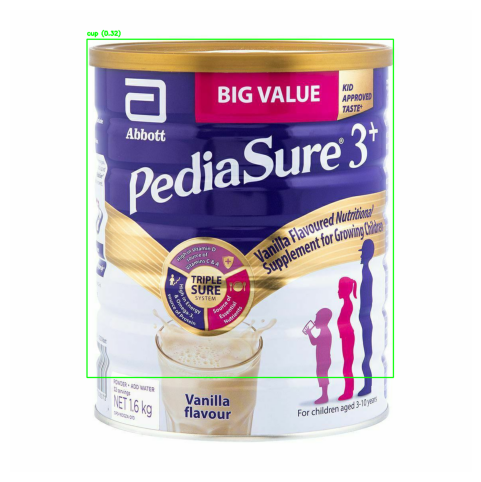


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_14554.jpg: 640x640 1 cake, 10.8ms
Speed: 2.5ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_14554.jpg


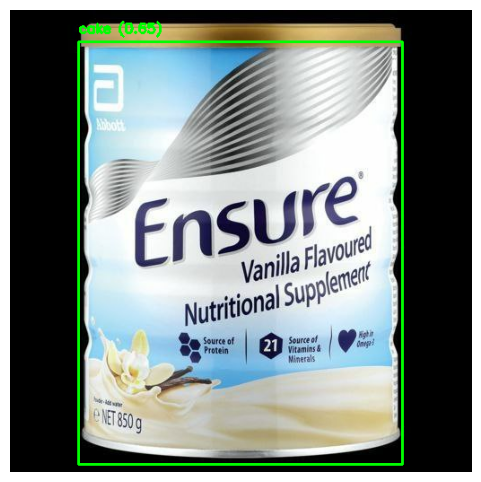


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@PHARMA39INFO_139.jpg: 640x384 (no detections), 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
🔍 Processing: @PHARMA39INFO_139.jpg


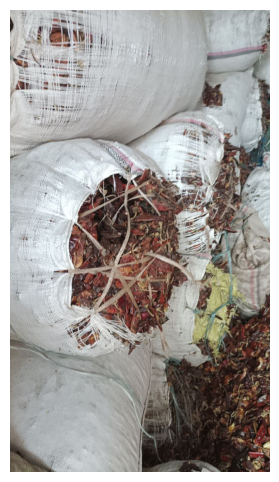


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_14179.jpg: 640x640 1 cup, 1 cell phone, 9.5ms
Speed: 2.5ms preprocess, 9.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_14179.jpg


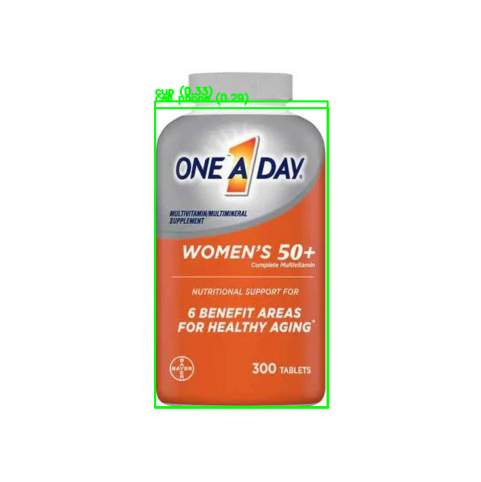


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@PHARMA39INFO_618.jpg: 640x640 1 clock, 9.7ms
Speed: 2.9ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @PHARMA39INFO_618.jpg


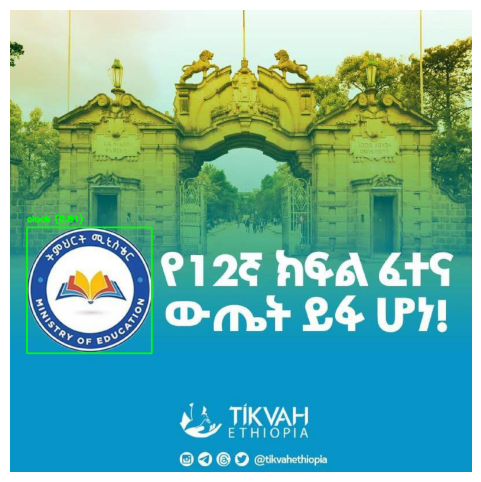


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_15110.jpg: 480x640 1 cup, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
🔍 Processing: @lobelia4cosmetics_15110.jpg


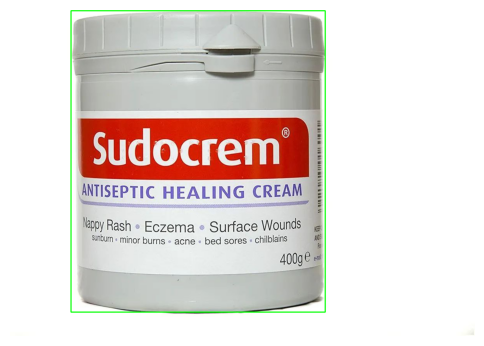


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_13003.jpg: 640x640 1 donut, 10.1ms
Speed: 3.1ms preprocess, 10.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_13003.jpg


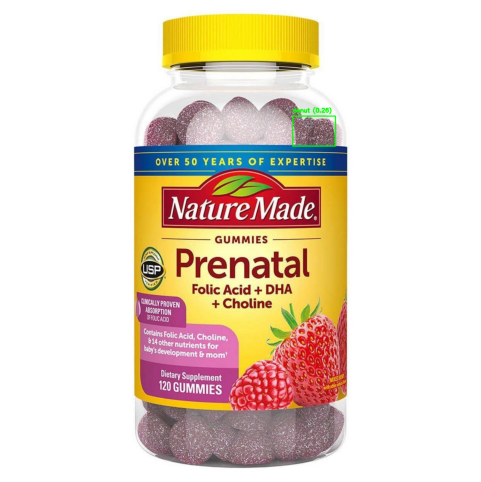


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_13240.jpg: 640x640 (no detections), 9.2ms
Speed: 3.3ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_13240.jpg


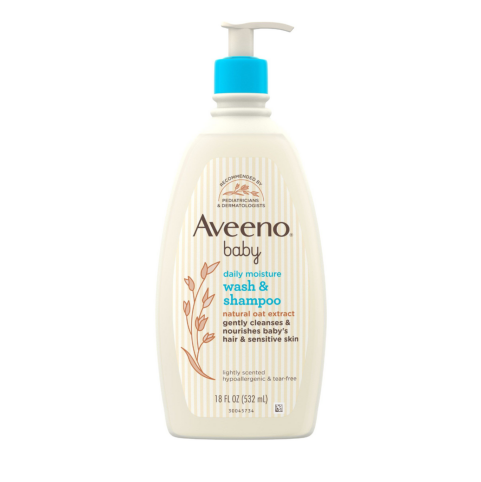


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_14444.jpg: 640x640 (no detections), 10.8ms
Speed: 3.1ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_14444.jpg


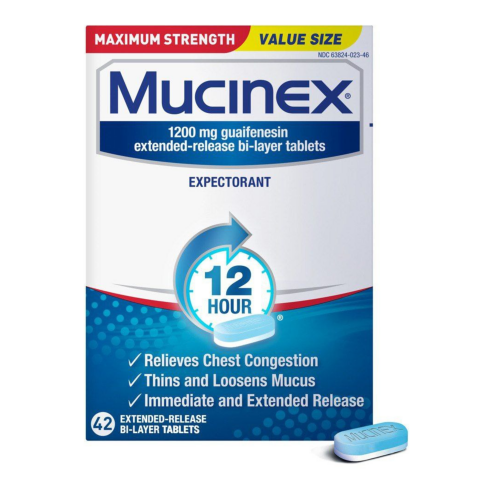


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_14547.jpg: 640x640 1 donut, 10.4ms
Speed: 3.2ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_14547.jpg


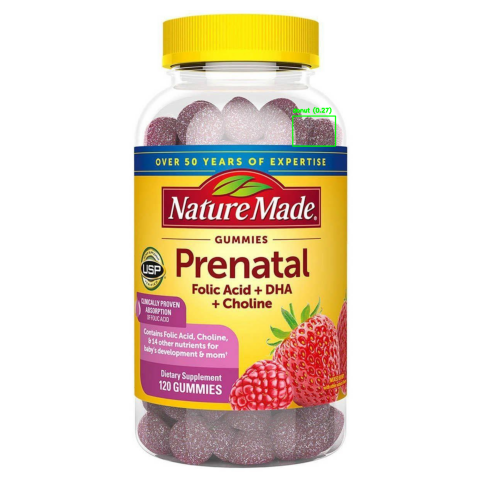

In [13]:
import os
import random
import matplotlib.pyplot as plt
random.seed(45) 
# Ensure YOLO uses GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load YOLO v11n model
model = YOLO("yolo11n.pt").to(device)

# Folder where images are stored
images_folder = "/kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos"  # Update this with actual path

# Get all image filenames in the folder
all_images = [f for f in os.listdir(images_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select 20 images
# Get all image filenames in the folder
all_images = [f for f in os.listdir(images_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select 20 images
random_images = random.sample(all_images, min(10, len(all_images)))
print(f"✅ Selected test images: {random_images}")

# Function to display image with bounding boxes
def display_detections(image_path, results):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    for result in results:
        if result.boxes is None:  # Skip if no detections
            continue

        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert to integers
            conf = box.conf[0].item()  # Confidence score
            cls = result.names[int(box.cls[0].item())]  # Class label

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{cls} ({conf:.2f})", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Run object detection on selected images
for image_filename in random_images:
    image_path = os.path.join(images_folder, image_filename)

    # Perform object detection
    results = model(image_path)

    # Display results
    print(f"🔍 Processing: {image_filename}")
    display_detections(image_path, results)


Using device: cuda
✅ Selected test images: ['@PHARMA39INFO_766.jpg', '@lobelia4cosmetics_13509.jpg', '@lobelia4cosmetics_15200.jpg', '@PHARMA39INFO_196.jpg', '@lobelia4cosmetics_13800.jpg', '@lobelia4cosmetics_13807.jpg', '@lobelia4cosmetics_14950.jpg', '@lobelia4cosmetics_14111.jpg', '@lobelia4cosmetics_13953.jpg', '@lobelia4cosmetics_14084.jpg']

image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@PHARMA39INFO_766.jpg: 640x512 1 kite, 41.5ms
Speed: 2.6ms preprocess, 41.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
🔍 Processing: @PHARMA39INFO_766.jpg


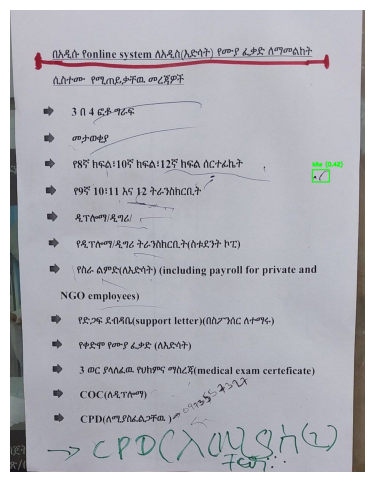


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_13509.jpg: 640x448 (no detections), 37.7ms
Speed: 1.8ms preprocess, 37.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)
🔍 Processing: @lobelia4cosmetics_13509.jpg


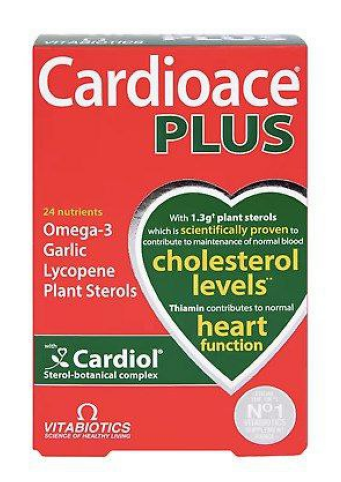


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_15200.jpg: 640x640 1 apple, 16.5ms
Speed: 2.9ms preprocess, 16.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_15200.jpg


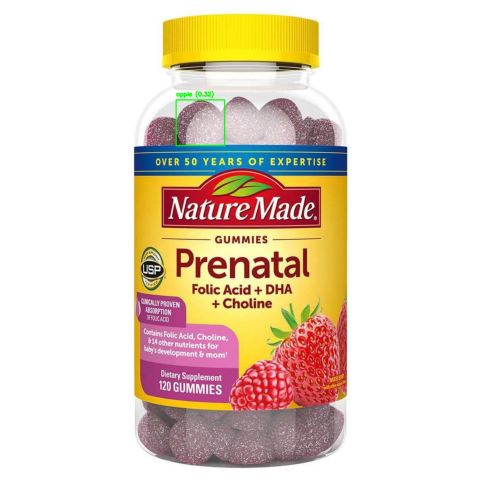


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@PHARMA39INFO_196.jpg: 480x640 (no detections), 40.3ms
Speed: 2.2ms preprocess, 40.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
🔍 Processing: @PHARMA39INFO_196.jpg


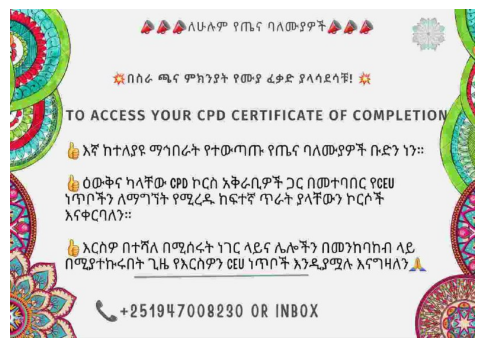


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_13800.jpg: 640x640 (no detections), 16.6ms
Speed: 2.7ms preprocess, 16.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_13800.jpg


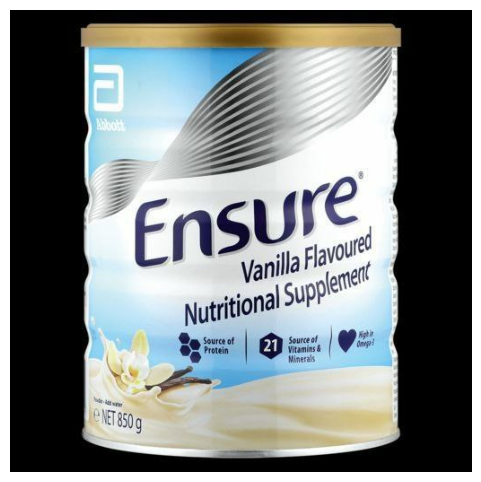


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_13807.jpg: 640x640 1 knife, 1 cake, 15.9ms
Speed: 2.3ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_13807.jpg


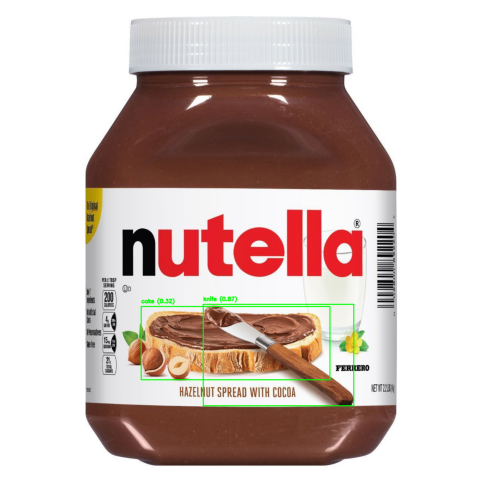


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_14950.jpg: 640x640 1 book, 15.9ms
Speed: 3.1ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_14950.jpg


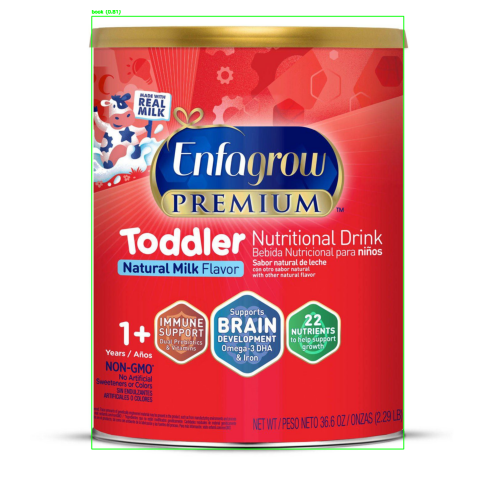


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_14111.jpg: 576x640 (no detections), 39.4ms
Speed: 2.8ms preprocess, 39.4ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 640)
🔍 Processing: @lobelia4cosmetics_14111.jpg


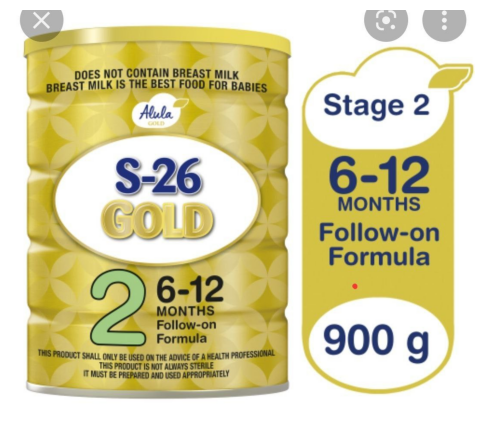


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_13953.jpg: 640x480 (no detections), 38.0ms
Speed: 2.1ms preprocess, 38.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
🔍 Processing: @lobelia4cosmetics_13953.jpg


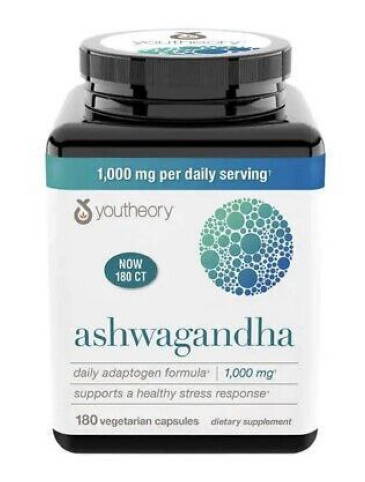


image 1/1 /kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos/@lobelia4cosmetics_14084.jpg: 640x640 1 cell phone, 16.6ms
Speed: 2.3ms preprocess, 16.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
🔍 Processing: @lobelia4cosmetics_14084.jpg


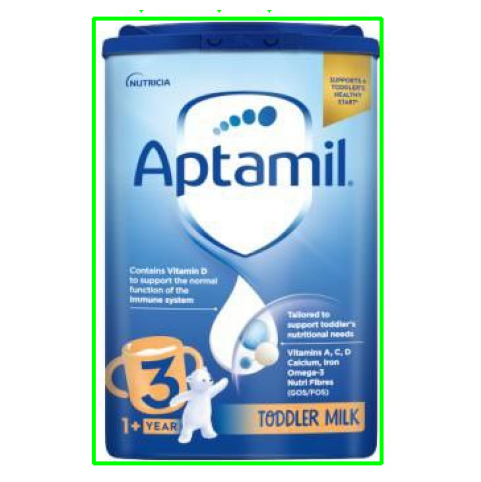

In [12]:
import os
import random
import matplotlib.pyplot as plt
random.seed(44) 
# Ensure YOLO uses GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load YOLO v11n model
model = YOLO("yolo11s.pt").to(device)

# Folder where images are stored
images_folder = "/kaggle/input/medical-images-and-csv-for-object-detection/medical_images/photos"  # Update this with actual path

# Get all image filenames in the folder
all_images = [f for f in os.listdir(images_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select 20 images
# Get all image filenames in the folder
all_images = [f for f in os.listdir(images_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Randomly select 20 images
random_images = random.sample(all_images, min(10, len(all_images)))
print(f"✅ Selected test images: {random_images}")

# Function to display image with bounding boxes
def display_detections(image_path, results):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    for result in results:
        if result.boxes is None:  # Skip if no detections
            continue

        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert to integers
            conf = box.conf[0].item()  # Confidence score
            cls = result.names[int(box.cls[0].item())]  # Class label

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{cls} ({conf:.2f})", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Run object detection on selected images
for image_filename in random_images:
    image_path = os.path.join(images_folder, image_filename)

    # Perform object detection
    results = model(image_path)

    # Display results
    print(f"🔍 Processing: {image_filename}")
    display_detections(image_path, results)
